<a href="https://colab.research.google.com/github/Saonoke/PVCK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [1]:
from google.colab import drive
import glob
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(' Gamma Corecction pada citra')
print('----------------------------')
try:
  gamma = int(input('Masukkan nilai gamma :'))
except:
  print('Nilai gamma harus berupa angka')




 Gamma Corecction pada citra
----------------------------
Masukkan nilai gamma :3


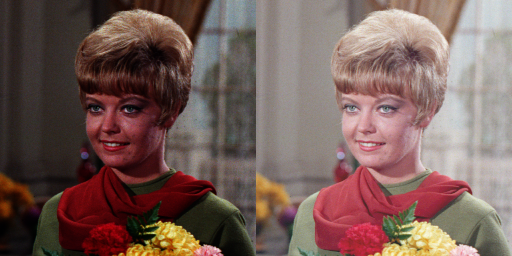

In [ ]:

image = cv.imread('/content/drive/MyDrive/female.tiff')
image_gamma = cv.imread('/content/drive/MyDrive/female.tiff')

for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    for k in range(image.shape[2]):
      image_gamma[i,j,k] = 255*(image_gamma[i,j,k]/255)**(1/gamma)

final_frame = cv.hconcat((image,image_gamma))
cv2_imshow(final_frame)

# Praktikum 2

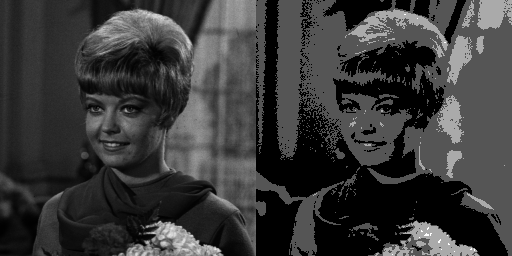

In [ ]:
bit_depth = 2
level = (255/(2**(bit_depth)-1))
original = cv.imread('/content/drive/MyDrive/female.tiff',cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape,original.dtype)

for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    depth_image[i,j] = round((original[i,j]/level))*level

final_frame = cv.hconcat((original,depth_image))
cv2_imshow(final_frame)


In [13]:
cv_img =[]
img_original = cv.imread('/content/drive/MyDrive/galaxy.jpg')
for img in glob.glob('/content/drive/MyDrive/noise/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)


In [8]:
def PNSR(img1,img2):
  mse = np.mean((img1-img2)**2)
  if mse == 0:
    return 100
  max_pixel = 255.0
  psnr = 20*np.log10(max_pixel/np.sqrt(mse))
  return psnr

def averageDenoising(index):
  denoised_image_5 = np.zeros_like(cv_img[0], dtype=np.float32)
  for i in range(index):
    denoised_image_5 += cv_img[i].astype(np.float32)

  return denoised_image_5

27.53497763536576


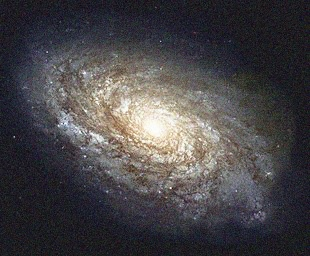

In [14]:
# 5 average
denoised_image_5 = averageDenoising(5)
denoised_image_5 /= 5
denoised_image_5 = np.uint8(denoised_image_5)
print(PNSR(img_original,denoised_image_5))
cv2_imshow(denoised_image_5)

27.55850387876913


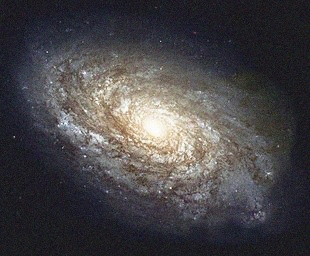

In [16]:
# 10 average
denoised_image_10 = averageDenoising(10)
denoised_image_10 /= 10
denoised_image_10 = np.uint8(denoised_image_10)
print(PNSR(img_original,denoised_image_10))
cv2_imshow(denoised_image_10)

27.515449477172513


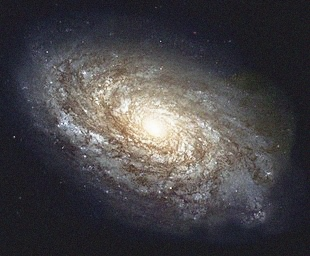

In [17]:
# 20 average
denoised_image_20 = averageDenoising(20)
denoised_image_20 /= 20
denoised_image_20 = np.uint8(denoised_image_20)
print(PNSR(img_original,denoised_image_20))
cv2_imshow(denoised_image_20)

27.461878301656313


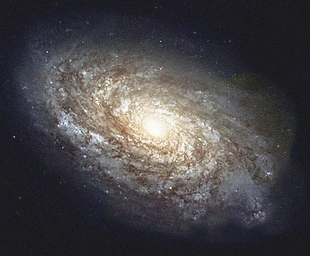

In [18]:
# 40 average
denoised_image_40 = averageDenoising(40)
denoised_image_40 /= 40
denoised_image_40 = np.uint8(denoised_image_40)
print(PNSR(img_original,denoised_image_40))
cv2_imshow(denoised_image_40)

27.399875990746292


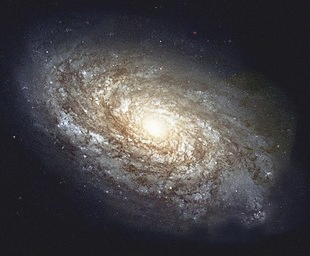

In [19]:
# 80 average
denoised_image_80 = averageDenoising(80)
denoised_image_80 /= 80
denoised_image_80 = np.uint8(denoised_image_80)
print(PNSR(img_original,denoised_image_80))
cv2_imshow(denoised_image_80)

27.370931279516654


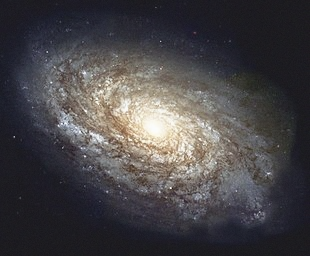

In [20]:
# 100 average
denoised_image_100 = averageDenoising(100)
denoised_image_100 /= 100
denoised_image_100 = np.uint8(denoised_image_100)
print(PNSR(img_original,denoised_image_100))
cv2_imshow(denoised_image_100)

## Kesimpulan yang dapat diambil
Semakin banyak image yang digunakan untuk average denoising maka hasilnya akan semakin baik. dan nilai PNSR yang semakin kecil maka menunjukkan semakin baik.

# Tugas 3

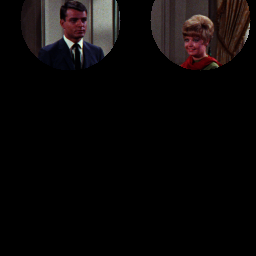

In [ ]:
image_original = cv.imread('/content/drive/MyDrive/couple.tiff')
mask = np.zeros(image_original.shape[:2], dtype="uint8")



radius = 50
cv.circle(mask, (200,20), radius, 255, -1)
cv.circle(mask, (70,20), radius, 255, -1)
image_masked = cv.bitwise_or(image_original,image_original,mask=mask)
cv2_imshow(image_masked)

# Tugas 4

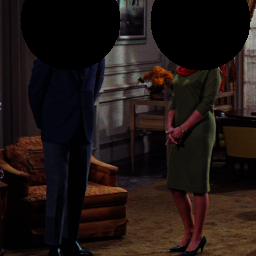

In [ ]:
#not
image_original = cv.imread('/content/drive/MyDrive/couple.tiff')
mask = np.zeros(image_original.shape[:2], dtype="uint8")



radius = 50
cv.circle(mask, (200,20), radius, 255, -1)
cv.circle(mask, (70,20) , radius, 255, -1)
image_masked = cv.bitwise_not(mask)
image_masked = cv.bitwise_and(image_original,image_original,mask=image_masked)
cv2_imshow(image_masked)

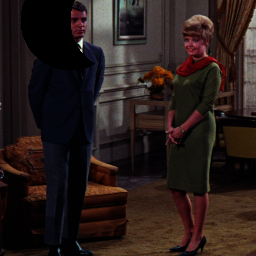

In [3]:
# Not and
image_original = cv.imread('/content/drive/MyDrive/couple.tiff')
mask = np.zeros(image_original.shape[:2], dtype="uint8")
mask1 = np.zeros(image_original.shape[:2], dtype="uint8")


radius = 50
cv.circle(mask, (120,20), radius, 255, -1)
cv.circle(mask1, (70,20) , radius, 255, -1)
image_masked = cv.bitwise_or(mask,cv.bitwise_not(mask1))
image_masked = cv.bitwise_and(image_original,image_original,mask=image_masked)
cv2_imshow(image_masked)

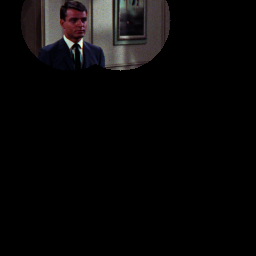

In [ ]:
# or
image_original = cv.imread('/content/drive/MyDrive/couple.tiff')
mask = np.zeros(image_original.shape[:2], dtype="uint8")
mask1 = np.zeros(image_original.shape[:2], dtype="uint8")


radius = 50
cv.circle(mask, (120,20), radius, 255, -1)
cv.circle(mask1, (70,20) , radius, 255, -1)
image_masked = cv.bitwise_or(mask,mask1)
image_masked = cv.bitwise_and(image_original,image_original,mask=image_masked)
cv2_imshow(image_masked)

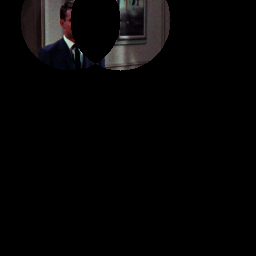

In [5]:
# xor
image_original = cv.imread('/content/drive/MyDrive/couple.tiff')
mask = np.zeros(image_original.shape[:2], dtype="uint8")
mask1 = np.zeros(image_original.shape[:2], dtype="uint8")


radius = 50
cv.circle(mask, (120,20), radius, 255, -1)
cv.circle(mask1, (70,20) , radius, 255, -1)
image_masked = cv.bitwise_xor(mask,mask1)
image_masked = cv.bitwise_and(image_original,image_original,mask=image_masked)
cv2_imshow(image_masked)